In [1]:
import GACC
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
outdf3,stats4 = GACC.cuda.evaluate(GACC.util.Distributions.Uniform(32),solver=0,steps=0,eps=0)

f40 = []
f41 = []
f20 = []
f21 = []

copyf40 = []
copyf41 = []
copyf20 = []
copyf21 = []

meanf40 = []
meanf41 = []
meanf20 = []
meanf21 = []

xs = []

eps = 0.01
nsteps = 0

ns = np.arange(10,22)**3 * 128

for n in tqdm(ns):
    df = GACC.util.Distributions.Plummer(n,M=1)

    tempf40 = []
    tempf41 = []
    tempf20 = []
    tempf21 = []

    for i in range(5):
        xs.append(n)

        outdf3,stats4 = GACC.cuda.evaluate(df,solver=0,steps=nsteps,eps=eps)

        f40.append(stats4['total_eval_time'])
        copyf40.append(stats4['total_copy_time'])
        tempf40.append(stats4['total_eval_time'])

        outdf,stats = GACC.cuda.evaluate(df,solver=1,steps=nsteps,eps=eps)

        f41.append(stats['total_eval_time'])
        copyf41.append(stats['total_copy_time'])
        tempf41.append(stats['total_eval_time'])

        outdf2,stats2 = GACC.cuda.cheap_evaluate(df,solver=0,steps=nsteps,eps=eps)

        f20.append(stats2['total_eval_time'])
        copyf20.append(stats2['total_copy_time'])
        tempf20.append(stats2['total_eval_time'])

        outdf3,stats3 = GACC.cuda.cheap_evaluate(df,solver=1,steps=nsteps,eps=eps)

        f21.append(stats3['total_eval_time'])
        copyf21.append(stats3['total_copy_time'])
        tempf21.append(stats3['total_eval_time'])
    
    meanf40.append(np.mean(np.array(tempf40)))
    meanf41.append(np.mean(np.array(tempf41)))
    meanf20.append(np.mean(np.array(tempf20)))
    meanf21.append(np.mean(np.array(tempf21)))

 25%|██▌       | 3/12 [00:27<01:30, 10.05s/it]

In [ ]:
def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

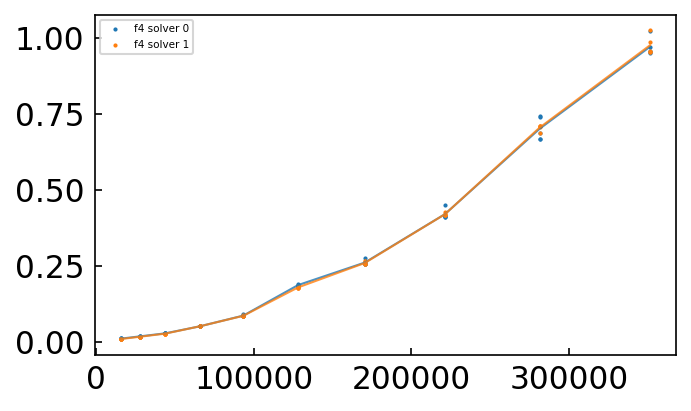

In [ ]:
s = 1
linewidth = 1
alpha=0.8
plt.scatter(xs,f40,label="f4 solver 0",s=s)
plt.scatter(xs,f41,label="f4 solver 1",s=s)
plt.scatter(xs,f20,label="f2 solver 0",s=s)
plt.scatter(xs,f21,label="f2 solver 1",s=s)
plt.plot(ns,meanf40,linewidth=linewidth,alpha=alpha)
plt.plot(ns,meanf41,linewidth=linewidth,alpha=alpha)
plt.plot(ns,meanf20,linewidth=linewidth,alpha=alpha)
plt.plot(ns,meanf21,linewidth=linewidth,alpha=alpha)
plt.legend()
plt.show()

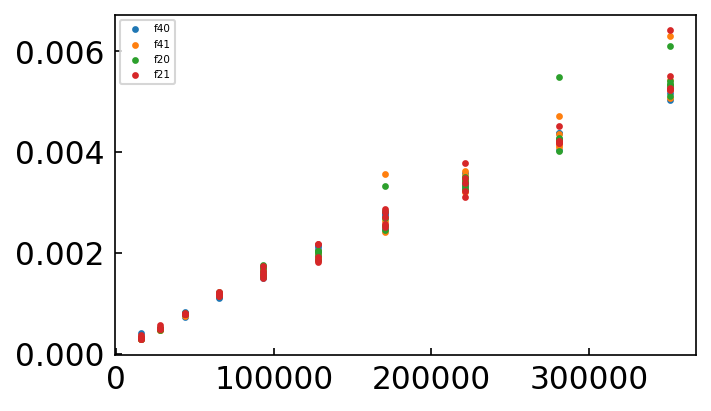

In [ ]:
s = 5
linewidth = 1
alpha=1

plt.scatter(xs,copyf40,s=s,alpha=alpha,label="f40")
plt.scatter(xs,copyf41,s=s,alpha=alpha,label="f41")
plt.scatter(xs,copyf20,s=s,alpha=alpha,label="f20")
plt.scatter(xs,copyf21,s=s,alpha=alpha,label="f21")

plt.legend()
plt.show()

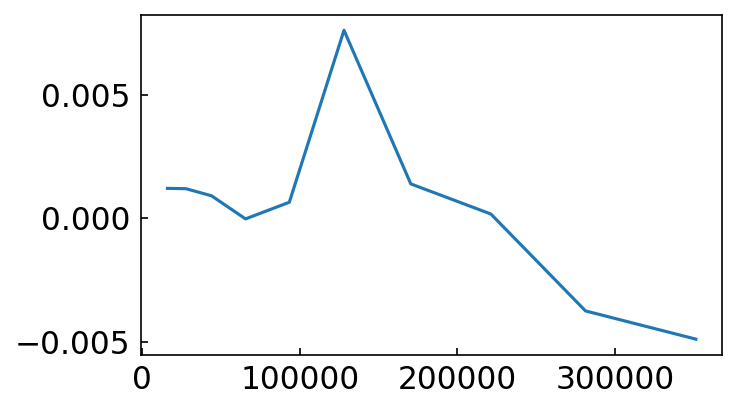

In [ ]:
meanf40 = np.array(meanf40)
meanf41 = np.array(meanf41)
plt.plot(ns,meanf40-meanf41)
plt.show()